In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"aniketsa","key":"89714b9825ebd984ff10893ecb7ede4e"}'}

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download rupakroy/online-payments-fraud-detection-dataset

online-payments-fraud-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
! unzip /content/online-payments-fraud-detection-dataset.zip

Archive:  /content/online-payments-fraud-detection-dataset.zip
replace PS_20174392719_1491204439457_log.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


#

Data Collection.
*   Collect the dataset or Create the dataset


•	Data Preprocessing.
*     Import the Libraries.
*   	Importing the dataset.
*   	Checking for Null Values.              
*   	Data Visualization.
*     Outlier Detection
*     Splitting Dependent and Independent variables
*     Encoding
*     Feature Scaling.
*     Splitting Data into Train and Test.


•	Model Building
*   Import the model building Libraries
*   Initializing the model
*   Training and testing the model
*   Evaluation of Model
*   Save the Model


# Data visualization


## Import the Libraries


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

In [12]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [13]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [14]:
df.drop(['isFlaggedFraud'],axis=1,inplace=True)

In [15]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [16]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [17]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [18]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<ipython-input-19-084798591dac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

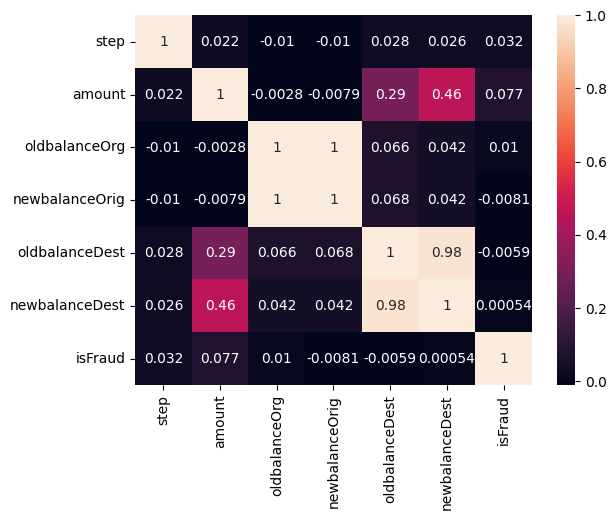

In [19]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='amount', ylabel='Count'>

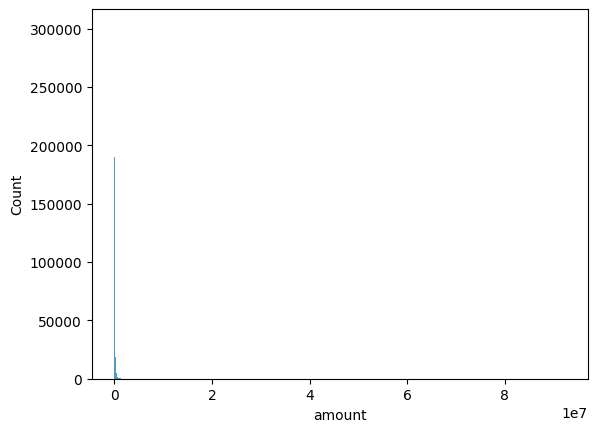

In [20]:
sns.histplot(data=df,x='amount')

<Axes: xlabel='step'>

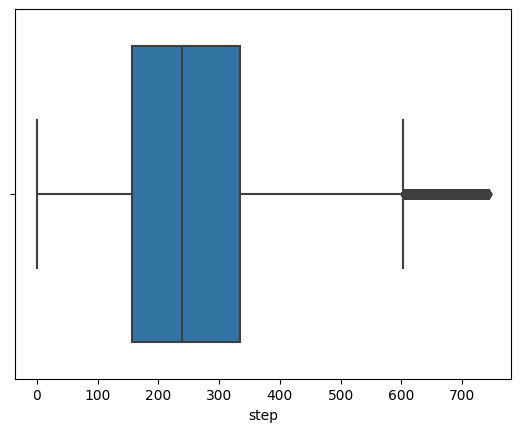

In [21]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

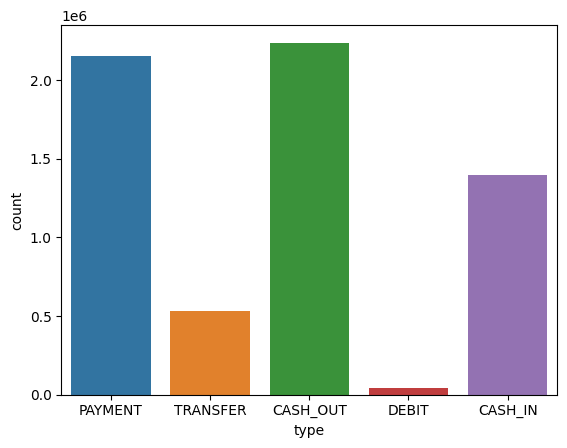

In [22]:
sns.countplot(data=df,x='type')

<Axes: xlabel='step'>

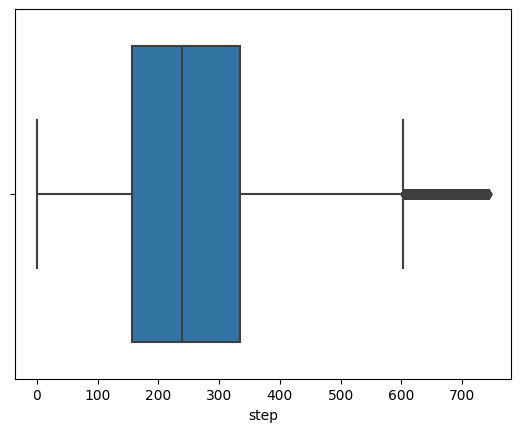

In [23]:
sns.boxplot(data=df,x='step')

(0.0, 2000.0)

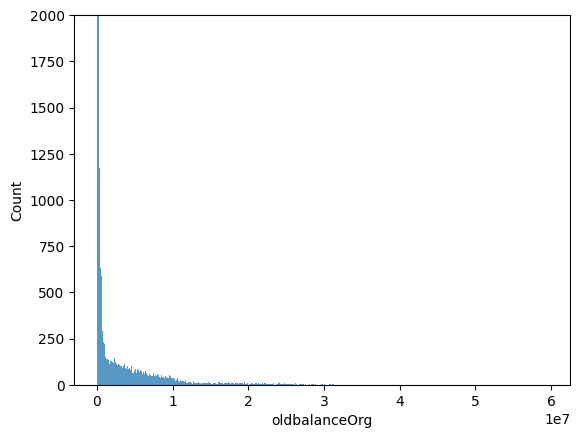

In [24]:
import matplotlib.pyplot as plt
sns.histplot(data=df,x='oldbalanceOrg')
plt.ylim(0,2000)

In [25]:
df['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

<Axes: xlabel='oldbalanceDest'>

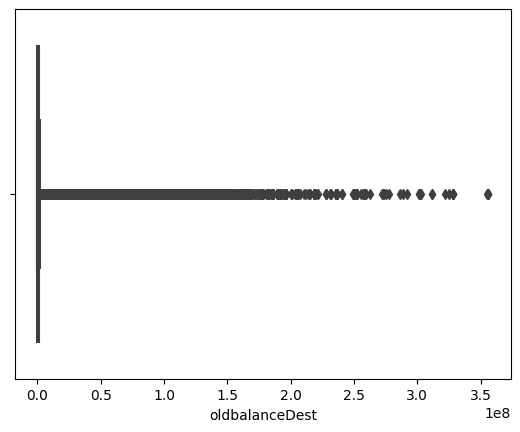

In [26]:
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

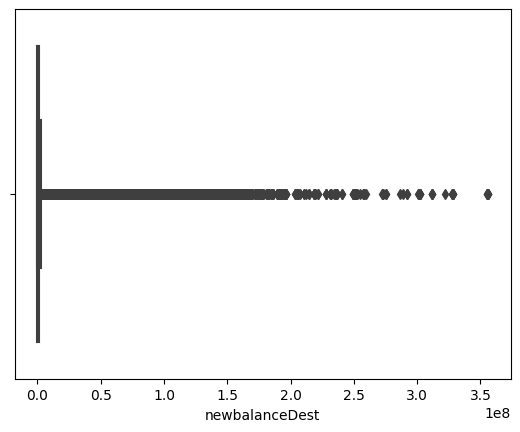

In [27]:
sns.boxplot(data=df,x='newbalanceDest')

(0.0, 20000.0)

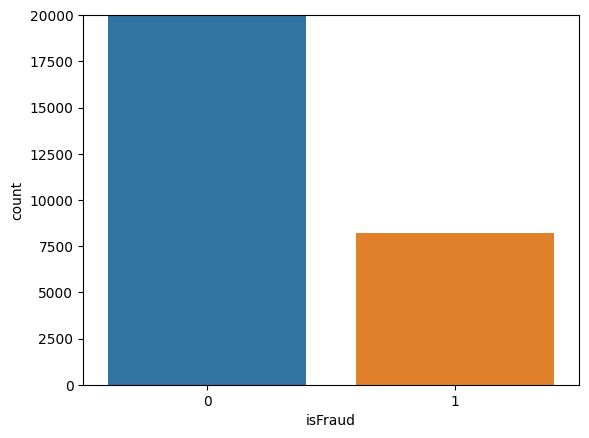

In [28]:
sns.countplot(data=df,x='isFraud')
plt.ylim(0,20000)

In [29]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<Axes: xlabel='type', ylabel='count'>

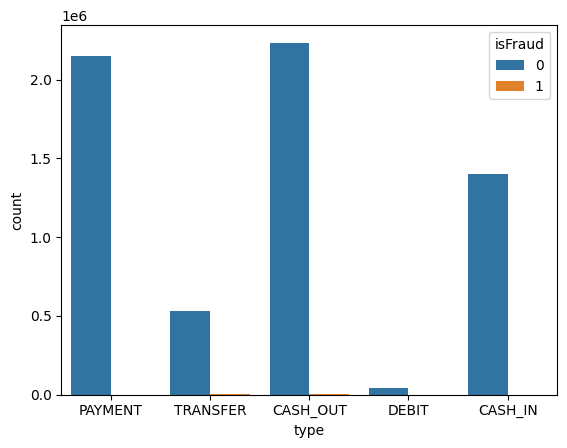

In [30]:
sns.countplot(data=df,x='type',hue='isFraud')

(0.0, 1000000.0)

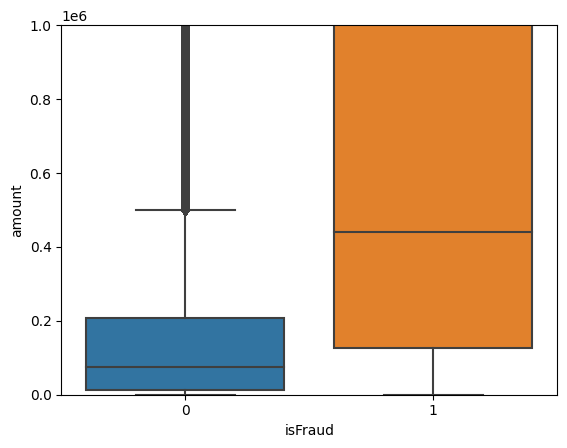

In [31]:
sns.boxplot(data=df,x='isFraud',y='amount')
plt.ylim(0,1000000)

# Data preprocessing

## Import libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## importing dataset

In [33]:
# df=pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

In [34]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [35]:
df.shape

(6362620, 10)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [37]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [38]:
 #removing unnecessary attributes
df = df[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud"]]


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 339.8+ MB


## Checking for Null Values


In [40]:
df.isnull().any()

type              False
amount            False
oldbalanceOrg     False
newbalanceOrig    False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
dtype: bool

In [41]:
df.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

## Outlier Detection

(0.0, 1000000.0)

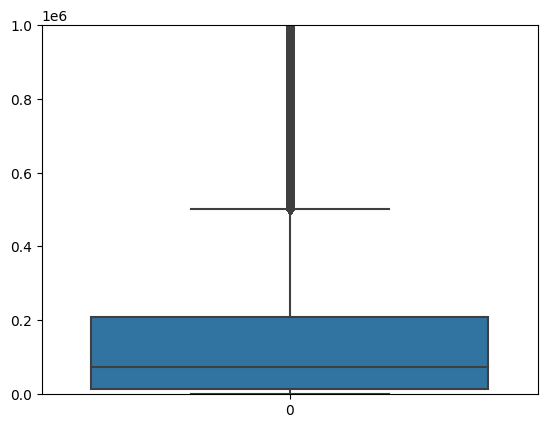

In [42]:
sns.boxplot(df['amount'])
plt.ylim(0,1000000)

##Remove Outlier

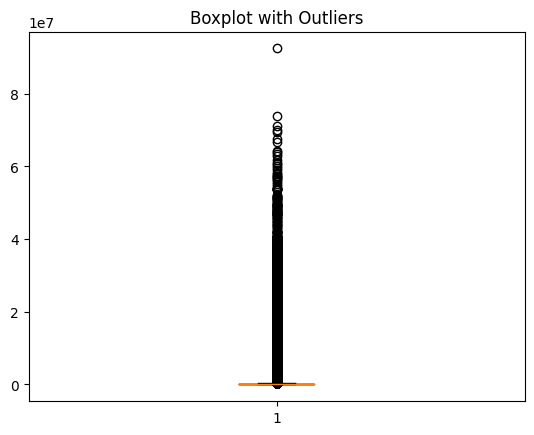

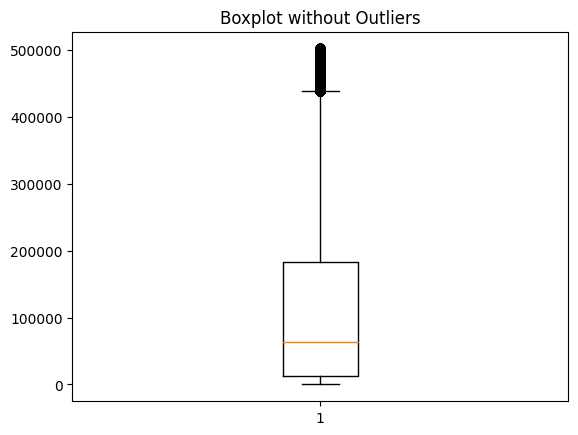

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data with outliers
data = df['amount']

# Create a boxplot to visualize the data and identify outliers
plt.boxplot(data)
plt.title('Boxplot with Outliers')
plt.show()

# Calculate the IQR (Interquartile Range)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

# Define the lower and upper bounds to identify outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out the outliers
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

# Create a boxplot of the filtered data
plt.boxplot(filtered_data)
plt.title('Boxplot without Outliers')
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


((array([-5.1833966 , -5.01553166, -4.92509216, ...,  4.92509216,
          5.01553166,  5.1833966 ]),
  array([       -inf,        -inf,        -inf, ..., 18.08061679,
         18.11718754, 18.34213002])),
 (nan, nan, nan))

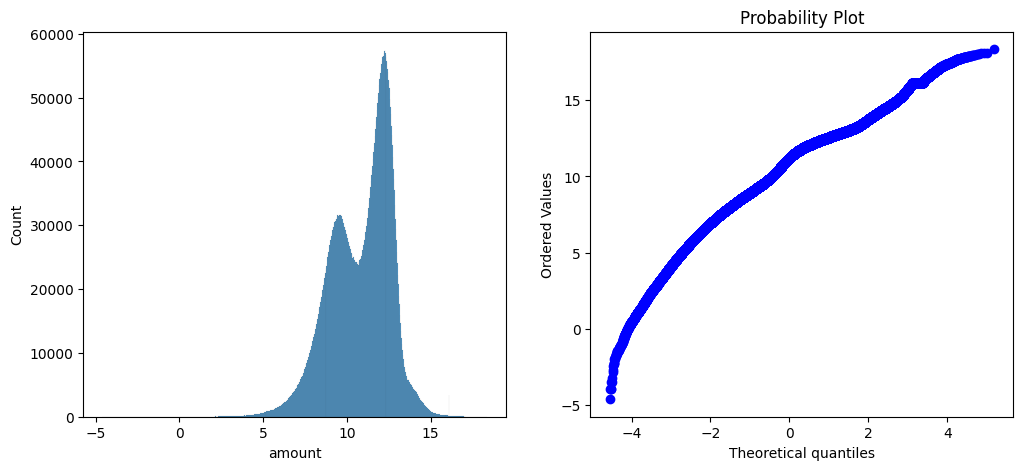

In [44]:
from scipy import stats
import matplotlib.pyplot as plt
feature=np.log(df['amount'])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(feature)
plt.subplot(1,2,2)
stats.probplot(feature,plot=plt)

## Splitting Dependent and Independent variables

In [45]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [46]:
X= df.drop('isFraud',axis=1)
y=df['isFraud']

In [47]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0


In [48]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

## Encoding

In [49]:
X.info() # only need to encode type as there is no other string value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
dtypes: float64(5), object(1)
memory usage: 291.3+ MB


In [50]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0


In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X.type=le.fit_transform(X.type)
mappingType=dict(zip(le.classes_,range(len(le.classes_))))
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.0,160296.36,0.0,0.0
1,3,1864.28,21249.0,19384.72,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,3,11668.14,41554.0,29885.86,0.0,0.0


In [52]:
mappingType

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}

## Feature Scaling

In [53]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.0,160296.36,0.0,0.0
1,3,1864.28,21249.0,19384.72,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,3,11668.14,41554.0,29885.86,0.0,0.0


In [54]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_scaled=pd.DataFrame(ms.fit_transform(X),columns=X.columns)

In [55]:
X_scaled.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.75,0.000106,0.002855,0.003233,0.000000,0.0
1,0.75,0.000020,0.000357,0.000391,0.000000,0.0
2,1.00,0.000002,0.000003,0.000000,0.000000,0.0
3,0.25,0.000002,0.000003,0.000000,0.000059,0.0
4,0.75,0.000126,0.000697,0.000603,0.000000,0.0


## Splitting Data into Train and Test

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size =0.2,random_state =0)

In [57]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5090096, 6), (1272524, 6), (5090096,), (1272524,))

# Model Building

## Importing the model building Libraries

In [58]:
from sklearn.linear_model import LogisticRegression


## Initialize the model

In [59]:
model=LogisticRegression()

In [60]:
model

LogisticRegression()

## Training and Testing the model

In [61]:
model.fit(x_train,y_train)

LogisticRegression()

In [62]:
pred=model.predict(x_test)

In [63]:
res = pd.DataFrame({'Original Value':y_test,'Predicted Value':pred})
res.head(5)

,Original Value,Predicted Value
4644207,0,0
3800666,0,0
4426240,0,0
5788765,0,0
2010701,0,0


## Evaluation of model

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report
# Calculate regression metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test,pred)

print("Regression Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

Regression Metrics:
MAE: 0.0011921189698583289
MSE: 0.0011921189698583289
RMSE: 0.034527075894988976
R2 Score: 0.07437002241499024


In [65]:
# all the libraries of evaluating model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [66]:
print(accuracy_score(y_test,pred))

0.9988078810301416


In [67]:
confusion_matrix(y_test,pred)

array([[1270880,       3],
       [   1514,     127]])

In [68]:
pd.crosstab(y_test,pred)

col_0,0,1
isFraud,,
0,1270880,3
1,1514,127


In [69]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.98      0.08      0.14      1641

    accuracy                           1.00   1272524
   macro avg       0.99      0.54      0.57   1272524
weighted avg       1.00      1.00      1.00   1272524



## ROC-curve

In [70]:
probability=model.predict_proba(x_test)[:,1]
probability

array([0.00034006, 0.00169209, 0.00082203, ..., 0.00079488, 0.00073166,
       0.00235239])

In [71]:
fpr,tpr,threshsholds = roc_curve(y_test,probability)

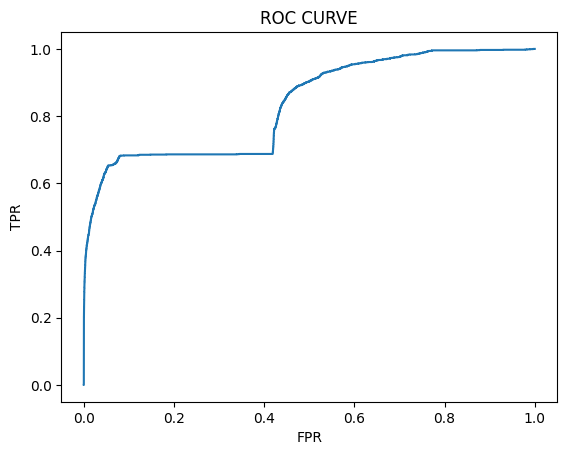

In [72]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

## Save the model

In [73]:
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(ms, file)
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# tune the model


## Hyperparameter tuning

In [75]:
from sklearn.model_selection import GridSearchCV
# 3. Hyperparameter Tuning
# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)

# Print the best model's accuracy on the test set
best_model = grid_search.best_estimator_
best_model_accuracy = best_model.score(x_test, y_test)
print("Best Model Accuracy on Test Set:", best_model_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Best Hyperparameters: {'C': 100}
Best Model Accuracy on Test Set: 0.9991080718320441


## Validation Method

In [76]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Assuming you have a DataFrame 'X' containing features and a Series 'y' containing target values

# 1. Regression Task: Cross-validation for R2 score
# Specify the number of folds (e.g., 5-fold cross-validation)
cv_r2 = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')

# Print the cross-validated R2 scores
print("Cross-validated R2 scores:", cv_r2)
print("Mean R2 score:", cv_r2.mean())

# 2. Classification Task: Cross-validation for Accuracy
# Assume binary classification (modify accordingly for multi-class)
cv_accuracy = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

# Print the cross-validated accuracy scores
print("\nCross-validated Accuracy scores:", cv_accuracy)
print("Mean Accuracy:", cv_accuracy.mean())


Cross-validated R2 scores: [ 0.04993121  0.06639581  0.07732361 -0.05553204  0.09804422]
Mean R2 score: 0.04723256211112801

Cross-validated Accuracy scores: [0.99877566 0.99879688 0.99881024 0.99863893 0.99883696]
Mean Accuracy: 0.9987717323995462
